<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [464]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\dgomonov\new-york-city-airbnb-open-data\versions\3
True


## A. Discovering


Display the first 10 rows

In [465]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [466]:
pd.Series(df.columns[df.dtypes != 'object'])

0                                id
1                           host_id
2                          latitude
3                         longitude
4                             price
5                    minimum_nights
6                 number_of_reviews
7                 reviews_per_month
8    calculated_host_listings_count
9                  availability_365
dtype: object

Display the dataframe shape:

In [467]:
df.shape

(48895, 16)

Identify the numerical features:

In [468]:
pd.Series(df.columns[df.dtypes != 'object'])

0                                id
1                           host_id
2                          latitude
3                         longitude
4                             price
5                    minimum_nights
6                 number_of_reviews
7                 reviews_per_month
8    calculated_host_listings_count
9                  availability_365
dtype: object

Identify the categorical features

In [469]:
df.nunique()

# 'neighbourhood_group' column and 'room_type' column are categorical features

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

What are the top 5 questions this dataset might help answer?

In [470]:
# display numerical features

## B. Structuring

Check if the dataset has proper column types

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Check if the dataset has index issues

In [472]:
df.index

RangeIndex(start=0, stop=48895, step=1)

Check if the dataset has duplicated rows

In [473]:
df.duplicated().sum()

np.int64(0)

Convert columns to correct types (e.g., dates → datetime).

In [474]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

Identify at least one structural issue and describe how to fix it.

In [475]:
# put your answer here

## C. Cleaning



Check for missing values

In [476]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Check for outliers in `minimum_nights`

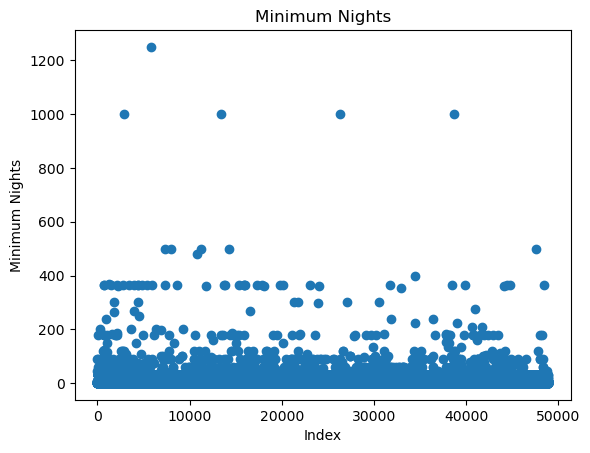

In [477]:
import matplotlib.pyplot as plt
plt.plot(df['minimum_nights'], 'o')
plt.title('Minimum Nights')
plt.xlabel('Index')
plt.ylabel('Minimum Nights')
plt.show()

In [478]:
# minimum nights 0-20
print("Minimun nights (0-20):", df[df['minimum_nights'] <= 20]['minimum_nights'].count())

# minimum nights 21-50
print("Minimun nights (21-50):", df[(df['minimum_nights'] > 20) & (df['minimum_nights'] <= 50)]['minimum_nights'].count())

# minimum nights greater than 100
print("Minimun nights (51-100):", df[(df['minimum_nights'] > 50) & (df['minimum_nights'] <= 100)]['minimum_nights'].count())

# minimum nights greater than 100
print("Minimun nights (100 above):", df[(df['minimum_nights'] > 100)]['minimum_nights'].count())

Minimun nights (0-20): 43565
Minimun nights (21-50): 4877
Minimun nights (51-100): 279
Minimun nights (100 above): 174


Check for invalid values (e.g., price ≤ 0)

In [479]:
df['price'].describe()


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [480]:
df[(df['price'] <= 0)]['price'].count()

np.int64(11)

Apply a missing-value strategy (drop, fill, or flag)


In [481]:
df = df.dropna(subset=['name', 'host_name', 'last_review', 'reviews_per_month'])
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Apply an outlier-handling strategy

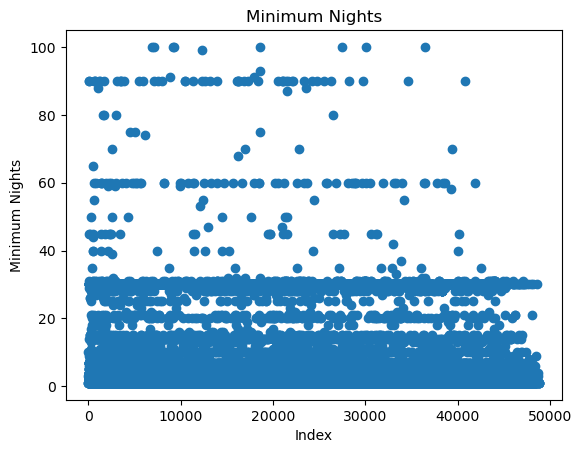

In [482]:
df = df[df['minimum_nights'] <= 100]

import matplotlib.pyplot as plt
plt.plot(df['minimum_nights'], 'o')
plt.title('Minimum Nights')
plt.xlabel('Index')
plt.ylabel('Minimum Nights')
plt.show()

## D. Enriching

In [483]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [484]:
df['price'].describe()

count    38732.000000
mean       142.325545
std        197.134183
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

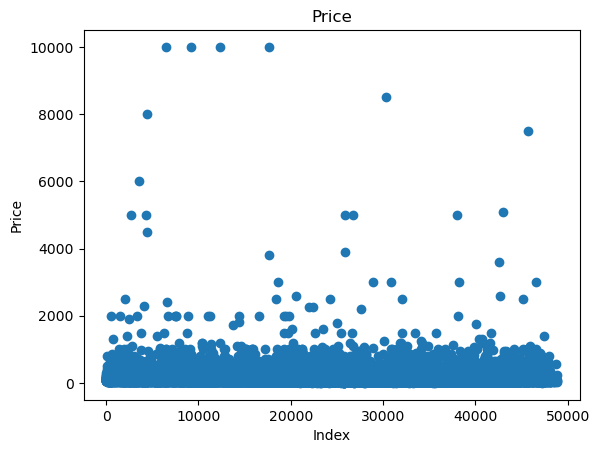

In [485]:
plt.plot(df['price'], 'o')
plt.title('Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

In [486]:
df['price_per_minimum_night'] = df['price'] / df['minimum_nights']
df['review_rate_per_month'] = df['number_of_reviews'] * df['reviews_per_month']
df['is_expensive'] = np.where(df['price'] > 150, 'Yes', 'No')

In [487]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.000000,1.89,No
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.000000,17.10,Yes
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.000000,1252.80,No
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.000000,0.90,No
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,66.666667,43.66,Yes
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,1.333333,19.60,No
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,39.500000,1492.10,No
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,39.500000,116.82,No
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,150.000000,212.80,No
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,27.000000,22.79,No


Create 1 aggregated summary table

(e.g. average price per neighborhood, number of hosts per borough)

In [488]:
df_grouped = df.groupby('neighbourhood_group')["price_per_minimum_night"].mean()
df_grouped

neighbourhood_group
Bronx            46.152819
Brooklyn         56.226413
Manhattan        80.267360
Queens           54.033429
Staten Island    48.213141
Name: price_per_minimum_night, dtype: float64

## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [489]:
price_count_violate = (df['price'] < 0).sum()
host_id_violate = df['host_id'].isnull().sum()
minimum_nights_violate = (df['minimum_nights'] <= 0).sum()

print("Number of price violations:", price_count_violate)
print("Number of host_id violations:", host_id_violate)
print("Number of minimum_nights violations:", minimum_nights_violate)

report = """Data Validation Report
Number of price violations: {price_count_violate}
Number of host_id violations: {host_id_violate}
Number of minimum_nights violations: {minimum_nights_violate}
"""


Number of price violations: 0
Number of host_id violations: 0
Number of minimum_nights violations: 0


## F. Publishing

Select final columns for publication.



In [490]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_minimum_night,review_rate_per_month,is_expensive
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.0,1.89,No
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0,17.10,Yes
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0,1252.80,No


In [491]:
df = df[['name', 'host_name', 'neighbourhood_group', 'room_type', 'price_per_minimum_night', 'review_rate_per_month']]
df.head(10)

,name,host_name,neighbourhood_group,room_type,price_per_minimum_night,review_rate_per_month
0,Clean & quiet apt home by the park,John,Brooklyn,Private room,149.000000,1.89
1,Skylit Midtown Castle,Jennifer,Manhattan,Entire home/apt,225.000000,17.10
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Entire home/apt,89.000000,1252.80
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,Entire home/apt,8.000000,0.90
5,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Entire home/apt,66.666667,43.66
6,BlissArtsSpace!,Garon,Brooklyn,Private room,1.333333,19.60
7,Large Furnished Room Near B'way,Shunichi,Manhattan,Private room,39.500000,1492.10
8,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Private room,39.500000,116.82
9,Cute & Cozy Lower East Side 1 bdrm,Ben,Manhattan,Entire home/apt,150.000000,212.80
10,Beautiful 1br on Upper West Side,Lena,Manhattan,Entire home/apt,27.000000,22.79


Export cleaned dataset as "cleaned_airbnb.csv"

In [492]:
# export dataset

df.to_csv('cleaned_airbnb_nyc.csv', index=False)

Export summary reports (e.g., validation or aggregations) as CSV.

In [493]:
report = """Data Validation Report

Number of price violations: {price_count_violate}
Number of host_id violations: {host_id_violate}
Number of minimum_nights violations: {minimum_nights_violate}
"""

with open('data_validation_report.txt', 'w') as f:
    f.write(report.format(price_count_violate=price_count_violate,
                          host_id_violate=host_id_violate,
                          minimum_nights_violate=minimum_nights_violate))